# Implementar el Algoritmo 7.7 de la página 112 de Bede (2013).

$\textbf{Algorithm }7.7:$

$1.\textit{ Input the crisp value }x_0.$

$2.\textit{ Calculate the firing strengths of each fuzzy rule: }\alpha_i = A_i(x_0).$

$3.\textit{ Calculate for a given }y \in Y \textit{ the output fuzzy set that is}$

$$B^{\prime}(y) = \bigvee_{i=1}^n (\alpha_i \wedge B_i(y))$$

$\textit{for a Mamdani rule base.}$

$4.\textit{ Defuzzify }B'(y_0) = \textit{defuzz}(B').$

$5.\textit{ Output }y_0.$





In [1]:
# En esta celdas estan las funciones utilizadas
# El algoritmo esta definido debajo de esta celda
import numpy as np

def is_triangular_number(triangular_number):
    '''
    Indica si es o no un numero triangular

    Args:
        triangular_number (list): valores del numero triangular
        
    Returns:
        boolean: True si es numero Triangular, False en caso contrario

    Example:
        >>> is_triangular_number(2.0, 3.0, 4.0)
        True
    '''
    return True if len(triangular_number) == 3 and triangular_number[0] < triangular_number[1] and triangular_number[1] < triangular_number[2] else False

def range_values(triangular_number_list):
    '''
    Calcula el rango de valores no nulos 

    Args:
        triangular_number_list (list): Lista de numeros triangulares.
        
    Returns:
        list: rango de valores con grado de pertenencia no nulos

    Example:
        >>> range_values([[2, 4, 6], [6, 4, 8]])
        array([2.        , 2.00600601, 2.01201201, 2.01801802, 2.02402402,
        ...
        7.97597598, 7.98198198, 7.98798799, 7.99399399, 8.        ])
        Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
    '''
    extremo_izq = min(triangular_number[0] for triangular_number in triangular_number_list)
    extremo_der = max(triangular_number[2] for triangular_number in triangular_number_list)

    return np.linspace(extremo_izq, extremo_der, 1000)


def triangular_membership_degree(x, triangular_number):
    '''
    Calcula el grado de pertenencia de un valor x en el numero triangular(conjunto difuso).

    Args:
        x (float): Número cuyo grado de pertenencia se va a evaluar.
        triangular number (list): Numero triangular.
        
    Returns:
        float: Grado de pertenencia de x

    Example:
        >>> triangular_membership_degree(2.25, [2.0, 3.0, 4.0])
        0.250000000000000
    '''
    if not(is_triangular_number(triangular_number)):
        print(triangular_number)
        raise ValueError("El parámetro debe ser un número triangular.")

    a, b, c = triangular_number

    return max(min((x-a)/(b-a), (c-x)/(c-b)), 0)

def firing_strengths(x0, antecedentes):
    '''
    Calcula los grados de activacion para x0

    Args:
        x0 (float): valor concreto y definido.
        antecedentes (list): lista con los numeros triangulares que seran antecedentes.
        
    Returns:
        list: lista con los grados de activacion para x0

    Example:
        >>> firing_strengths(2.25, [[1, 2, 3], [2, 3, 4]])
        [0.750000000000000, 0.250000000000000]
    '''
    return [triangular_membership_degree(x0, antecedente) for antecedente in antecedentes]

def mamdani_inferencia(consecuentes, firing_strengths_list):
    '''
    Calcula la inferencia de mamdani, retornando la distribucion de pertenencia B'

    Args:
        consecuentes (list): lista con los numeros triangulares que seran consecuentes.
        firing_strengths_list (list): lista con los grados de activacion para x0
        
    Returns:
        list: La distribucion de pertenencia B'

    Example:
        >>> mamdani_inferencia([[2, 4, 6], [4, 6, 8]], [0.750000000000000, 0.250000000000000])
        [0.0,
        0.0030030030030030463,
        ...
        0.0030030030030028243,
        0]
        Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
    '''
    valores_y = range_values(consecuentes)
    b_prima = [max([min(alpha, triangular_membership_degree(y, consecuente)) for alpha, consecuente in zip(firing_strengths_list, consecuentes)]) for y in valores_y]
    return b_prima



def godel_inferencia(consecuentes, firing_strengths_list):
    '''
    Calcula la inferencia de godel, retornando la distribucion de pertenencia B'

    Args:
        consecuentes (list): lista con los numeros triangulares que seran consecuentes.
        firing_strengths (list): lista con los grados de activacion para x0
        
    Returns:
        list: la distribucion de pertenencia B'

    Example:
        >>> godel_inferencia([[2, 4, 6], [4, 6, 8]], [0.750000000000000, 0.250000000000000])
        [0.0,
        0.0030030030030030463,
        ...
        0.0030030030030028243,
        0]
        Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
    '''
    valores_y = range_values(consecuentes)
    
    b_prima_godel = []
    for y in valores_y:
        salida_godel = [triangular_membership_degree(y, consecuente) for consecuente in consecuentes]
        b_prima_godel.append(max(min(alpha, salida) for alpha, salida in zip(firing_strengths_list, salida_godel)))
    
    return b_prima_godel


def defuzzify(b_prima, consecuentes):
    '''
    Desdifusifica B' 

    Args:
        b_prima (list): la distribucion de pertenencia B'
        firing_strengths (list): lista con los grados de activacion para x0
        
    Returns:
        float: Valor desfusificado

    Example:
        >>> defuzzify(godel_inferencia([[2, 4, 6], [4, 6, 8]], [0.750000000000000, 0.250000000000000]), [[2, 4, 6], [4, 6, 8]]) 
        4.578946768883771
    '''
    valores_y = range_values(consecuentes)
    numerador = sum(y*b for y, b in zip(valores_y, b_prima))
    denominador = sum(b_prima)
    return numerador/denominador if denominador != 0 else 0

def graficar(b_prima, y0, consecuentes):
    '''
    Imprime en pantalla B' y y0

    Args:
        b_prima (list): la distribucion de pertenencia B'
        y0 (float): Valor desfusificado
        consecuentes (list): lista con los numeros triangulares que seran consecuentes.
        
    Returns:
        None
    '''
    var('x,y')
    valores_y = range_values(consecuentes)
    g1 = {valores_y[i]: b_prima[i] for i in range(len(valores_y))}
    g2 = implicit_plot(x==y0,(x,valores_y[0],valores_y[-1]),(y,0,1), color='green')
    show(g2+ list_plot(g1), aspect_ratio=10, title=f'b\'(blue), y0={y0}(verde)')

In [2]:
def algoritmo(x0, antecedentes, consecuentes, algoritmo_inferencia=mamdani_inferencia):
    '''
    Desdifusifica un valor concreto y definido bajo ciertos antecedentes y consecuentes

    Args:
        x0 (float): valor concreto y definido.
        antecedentes (list): lista con los numeros triangulares que seran antecedentes.
        consecuentes (list): lista con los numeros triangulares que seran consecuentes.
        algoritmo_inferencia: puntero a funcion de inferencia mamdani o godel, por defecto usa mamdani
        
    Returns:
        list: 

    Example:
        >>> algoritmo(2.25,[[1, 2, 3], [2, 3, 4]],[[2, 4, 6], [4, 6, 8]],godel_inferencia)
        1- Input crisp:2.25000000000000
        2- Calculate firing strengths:
        [0.750000000000000, 0.250000000000000]
        3- Calculate inference
        [0.0, 0.0030030030030030463, ... 0.0030030030030028243, 0]
        4- Defuzzify
        5- Output: 4.578946768883771
    '''
    print(f'1- Input crisp:{x0}')

    print(f'2- Calculate firing strengths:')
    firing_strengths_list = firing_strengths(x0, antecedentes)
    print(firing_strengths_list)

    print(f'3- Calculate inference')
    b_prima = algoritmo_inferencia(consecuentes, firing_strengths_list)
    print(b_prima)

    print(f'4- Defuzzify')
    y0 = defuzzify(b_prima, consecuentes)


    print(f'5- Output: {y0}')

    return b_prima, y0

# Utilizar el algoritmo implementado para resolver el ejercicio 4 de la página 134 de Bede (2013).

$4.$ Consider a Mamdani fuzzy inference system with two antecedents $A_1 = (1, 3, 5)$ and $A_2 = (3, 5, 7)$, and two consequences $B_1 = (5, 10, 15)$ and $B_2 = (10, 15, 20)$.

In [3]:
# Definicion de antecedentes y consecuentes

antecedentes = [[1, 3, 5], [3, 5, 7]]
consecuentes = [[5, 10, 15], [10, 15, 20]]

a. Let $x_0 = 4$ be a crisp input for the fuzzy system considered. Find the firing strength of each rule, then graph the output $B'$ of the fuzzy inference system.

c. Does the output change if we consider the same fuzzy rule base with a Gödel inference?

# Calculo mamdani:
1- Input crisp:4
2- Calculate firing strengths:
[1/2, 1/2]
3- Calculate inference
[0.0, 0.003003003003003002, 0.006006006006006004, 0.009009009009009005, 0.012012012012012008, 0.01501501501501501, 0.01801801801801801, 0.021021021021021012, 0.024024024024024017, 0.027027027027027018, 0.03003003003003002, 0.033033033033033024, 0.03603603603603602, 0.03903903903903903, 0.042042042042042024, 0.04504504504504503, 0.048048048048048034, 0.05105105105105103, 0.054054054054054036, 0.057057057057057034, 0.06006006006006004, 0.06306306306306304, 0.06606606606606605, 0.06906906906906904, 0.07207207207207204, 0.07507507507507505, 0.07807807807807805, 0.08108108108108106, 0.08408408408408405, 0.08708708708708705, 0.09009009009009006, 0.09309309309309306, 0.09609609609609607, 0.09909909909909906, 0.10210210210210206, 0.10510510510510507, 0.10810810810810807, 0.11111111111111108, 0.11411411411411407, 0.11711711711711707, 0.12012012012012008, 0.12312312312312308, 0.1261261261261261, 

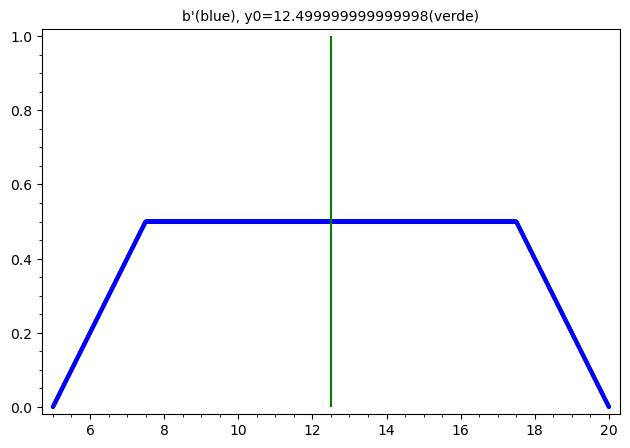


# Calculo godel:
1- Input crisp:4
2- Calculate firing strengths:
[1/2, 1/2]
3- Calculate inference
[0.0, 0.003003003003003002, 0.006006006006006004, 0.009009009009009005, 0.012012012012012008, 0.01501501501501501, 0.01801801801801801, 0.021021021021021012, 0.024024024024024017, 0.027027027027027018, 0.03003003003003002, 0.033033033033033024, 0.03603603603603602, 0.03903903903903903, 0.042042042042042024, 0.04504504504504503, 0.048048048048048034, 0.05105105105105103, 0.054054054054054036, 0.057057057057057034, 0.06006006006006004, 0.06306306306306304, 0.06606606606606605, 0.06906906906906904, 0.07207207207207204, 0.07507507507507505, 0.07807807807807805, 0.08108108108108106, 0.08408408408408405, 0.08708708708708705, 0.09009009009009006, 0.09309309309309306, 0.09609609609609607, 0.09909909909909906, 0.10210210210210206, 0.10510510510510507, 0.10810810810810807, 0.11111111111111108, 0.11411411411411407, 0.11711711711711707, 0.12012012012012008, 0.12312312312312308, 0.1261261261261261, 0

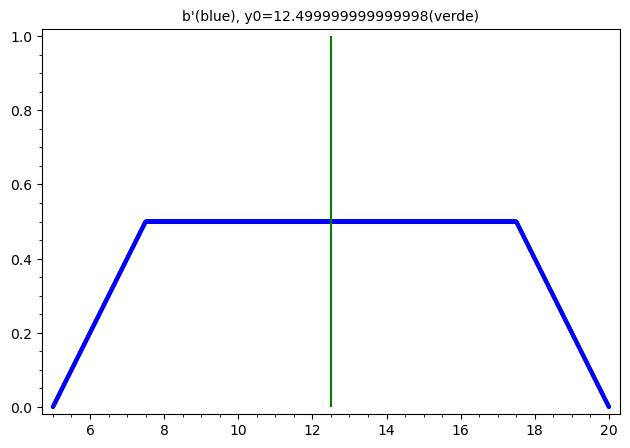


Las salidas no variaron comparando mamdani con godel.


In [4]:
# Item a
x0 = 4
print("# Calculo mamdani:")
b_prima,y0_mamdani = algoritmo(x0, antecedentes, consecuentes, mamdani_inferencia)

graficar(b_prima, y0_mamdani, consecuentes)

# Item c
print("\n# Calculo godel:")
b_prima,y0_godel = algoritmo(x0, antecedentes, consecuentes, godel_inferencia)

graficar(b_prima, y0_mamdani, consecuentes)

if y0_mamdani == y0_godel:
    print("\nLas salidas no variaron comparando mamdani con godel.")
else:
    print("\nSi variaron.")


b. Let $x_0 = 3.5$. Find the firing strength of each rule, then graph the output of the fuzzy inference system.

c. Does the output change if we consider the same fuzzy rule base with a Gödel inference?

# Calculo mamdani:
1- Input crisp:3.50000000000000
2- Calculate firing strengths:
[0.750000000000000, 0.250000000000000]
3- Calculate inference
[0.0, 0.003003003003003002, 0.006006006006006004, 0.009009009009009005, 0.012012012012012008, 0.01501501501501501, 0.01801801801801801, 0.021021021021021012, 0.024024024024024017, 0.027027027027027018, 0.03003003003003002, 0.033033033033033024, 0.03603603603603602, 0.03903903903903903, 0.042042042042042024, 0.04504504504504503, 0.048048048048048034, 0.05105105105105103, 0.054054054054054036, 0.057057057057057034, 0.06006006006006004, 0.06306306306306304, 0.06606606606606605, 0.06906906906906904, 0.07207207207207204, 0.07507507507507505, 0.07807807807807805, 0.08108108108108106, 0.08408408408408405, 0.08708708708708705, 0.09009009009009006, 0.09309309309309306, 0.09609609609609607, 0.09909909909909906, 0.10210210210210206, 0.10510510510510507, 0.10810810810810807, 0.11111111111111108, 0.11411411411411407, 0.11711711711711707, 0.12012012012012008

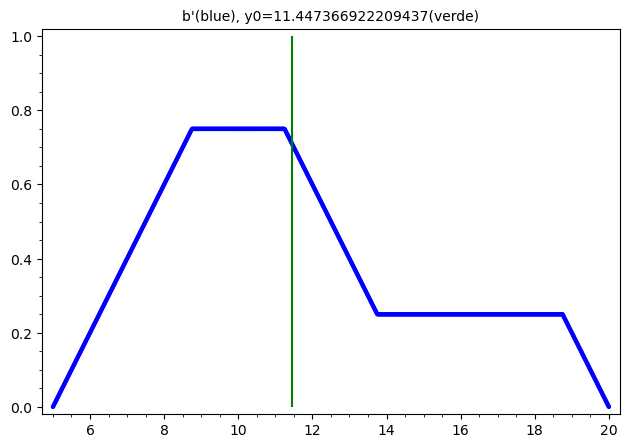


# Calculo godel:
1- Input crisp:3.50000000000000
2- Calculate firing strengths:
[0.750000000000000, 0.250000000000000]
3- Calculate inference
[0.0, 0.003003003003003002, 0.006006006006006004, 0.009009009009009005, 0.012012012012012008, 0.01501501501501501, 0.01801801801801801, 0.021021021021021012, 0.024024024024024017, 0.027027027027027018, 0.03003003003003002, 0.033033033033033024, 0.03603603603603602, 0.03903903903903903, 0.042042042042042024, 0.04504504504504503, 0.048048048048048034, 0.05105105105105103, 0.054054054054054036, 0.057057057057057034, 0.06006006006006004, 0.06306306306306304, 0.06606606606606605, 0.06906906906906904, 0.07207207207207204, 0.07507507507507505, 0.07807807807807805, 0.08108108108108106, 0.08408408408408405, 0.08708708708708705, 0.09009009009009006, 0.09309309309309306, 0.09609609609609607, 0.09909909909909906, 0.10210210210210206, 0.10510510510510507, 0.10810810810810807, 0.11111111111111108, 0.11411411411411407, 0.11711711711711707, 0.12012012012012008,

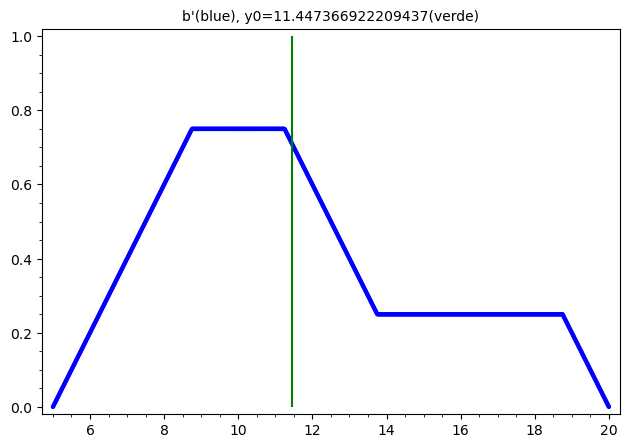


Las salidas no variaron comparando mamdani con godel.


In [5]:
# Item b
x0 = 3.5
print("# Calculo mamdani:")
b_prima,y0_mamdani = algoritmo(x0, antecedentes, consecuentes, mamdani_inferencia)

graficar(b_prima, y0_mamdani, consecuentes)

# Item c
print("\n# Calculo godel:")
b_prima,y0_godel = algoritmo(x0, antecedentes, consecuentes, godel_inferencia)

graficar(b_prima, y0_mamdani, consecuentes)

if y0_mamdani == y0_godel:
    print("\nLas salidas no variaron comparando mamdani con godel.")
else:
    print("\nSi variaron.")